# Data Science and Business Analytics
## Task3: Exploratory Data Analysis on Sample Superstore Dataset.
**The Sparks Foundation**

AUTHOR: GANESH KAILAS YEVLE

BATCH: GRIPJULY2022

 - Problem statement : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
 - What all business problems you can derive by exploring the data? 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset and read
dataset = pd.read_csv('SampleSuperstore.csv')
dataset.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
# size of dataset
dataset.shape

(9994, 13)

In [4]:
# type of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#describing dataset
dataset.describe(include='all')

Ship Mode   Segment        Country           City       State  \
count             9994      9994           9994           9994        9994   
unique               4         3              1            531          49   
top     Standard Class  Consumer  United States  New York City  California   
freq              5968      5191           9994            915        2001   
mean               NaN       NaN            NaN            NaN         NaN   
std                NaN       NaN            NaN            NaN         NaN   
min                NaN       NaN            NaN            NaN         NaN   
25%                NaN       NaN            NaN            NaN         NaN   
50%                NaN       NaN            NaN            NaN         NaN   
75%                NaN       NaN            NaN            NaN         NaN   
max                NaN       NaN            NaN            NaN         NaN   

         Postal Code Region         Category Sub-Category         Sales  \
count    9994.000000   9994             9994         9994   9994.000000   
unique           NaN      4                3           17           NaN   
top              NaN   West  Office Supplies      Binders           NaN   
freq             NaN   3203             6026         1523           NaN   
mean    55190.379428    NaN              NaN          NaN    229.858001   
std     32063.693350    NaN              NaN          NaN    623.245101   
min      1040.000000    NaN              NaN          NaN      0.444000   
25%     23223.000000    NaN              NaN          NaN     17.280000   
50%     56430.500000    NaN              NaN          NaN     54.490000   
75%     90008.000000    NaN              NaN          NaN    209.940000   
max     99301.000000    NaN              NaN          NaN  22638.480000   

           Quantity     Discount       Profit  
count   9994.000000  9994.000000  9994.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean       3.789574     0.156203    28.656896  
std        2.225110     0.206452   234.260108  
min        1.000000     0.000000 -6599.978000  
25%        2.000000     0.000000     1.728750  
50%        3.000000     0.200000     8.666500  
75%        5.000000     0.200000    29.364000  
max       14.000000     0.800000  8399.976000

In [6]:
#finding null values
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#find duplicate rows if any and drop
dataset.duplicated().sum()

17

In [8]:
dataset.drop_duplicates()

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9977 rows x 13 columns]

In [9]:
#find the unique values of a column
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#deleting irrelevant columns
dataset = dataset.drop('Postal Code',axis=1)

In [11]:
#relation between columns
dataset.corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000

In [12]:
dataset.cov()

Sales    Quantity   Discount        Profit
Sales     388434.455308  278.459923  -3.627228  69944.096586
Quantity     278.459923    4.951113   0.003961     34.534769
Discount      -3.627228    0.003961   0.042622    -10.615173
Profit     69944.096586   34.534769 -10.615173  54877.798055

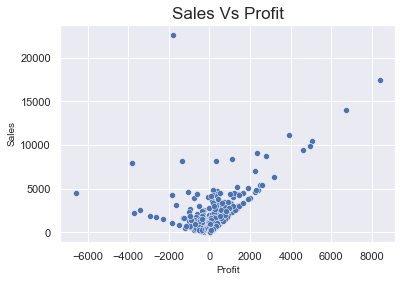

In [33]:
sns.set_style('darkgrid')
sns.scatterplot(y=dataset['Sales'], x=dataset['Profit'])
plt.title('Sales Vs Profit', size=17)
plt.xlabel('Profit', size=10)
plt.ylabel('Sales',size=10)
plt.show()

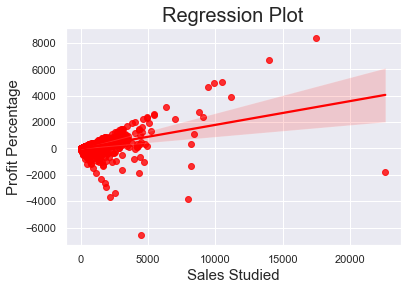

In [37]:
sns.regplot(x=dataset['Sales'],color="red",y=dataset['Profit'])
plt.title('Regression Plot', size=20)
plt.xlabel('Sales Studied',size=15)
plt.ylabel('Profit Percentage',size=15)
plt.show()

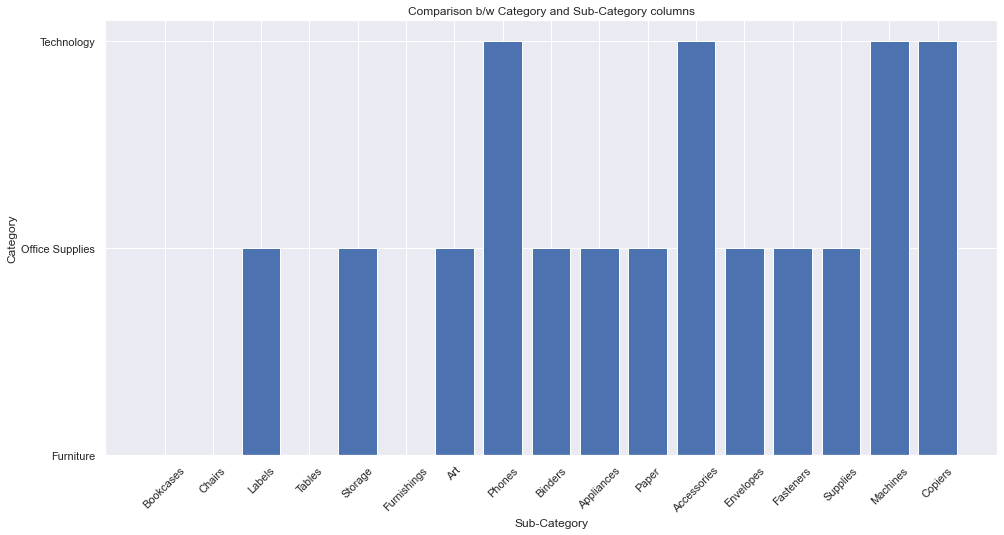

In [61]:
#Data Visualisation
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=dataset)
plt.title('Comparison b/w Category and Sub-Category columns')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

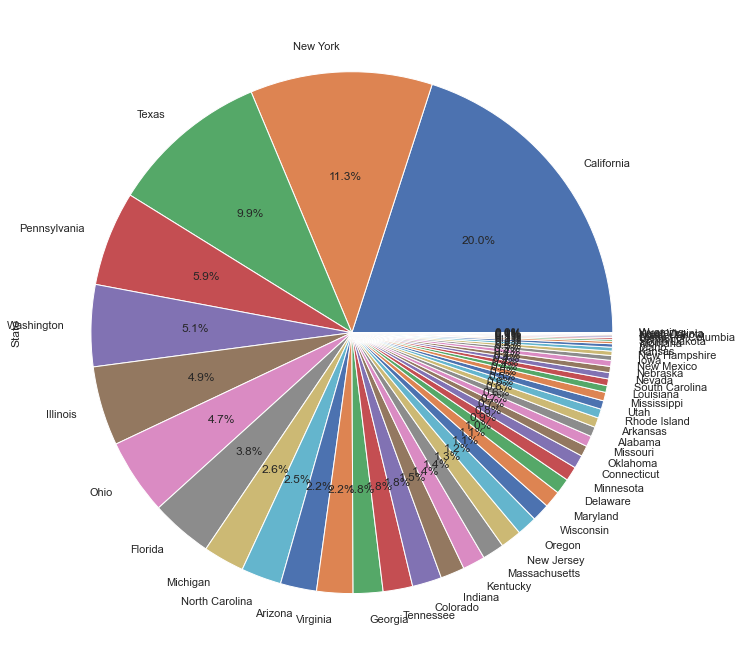

In [88]:
plt.figure(figsize=(12,12))
dataset['State'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

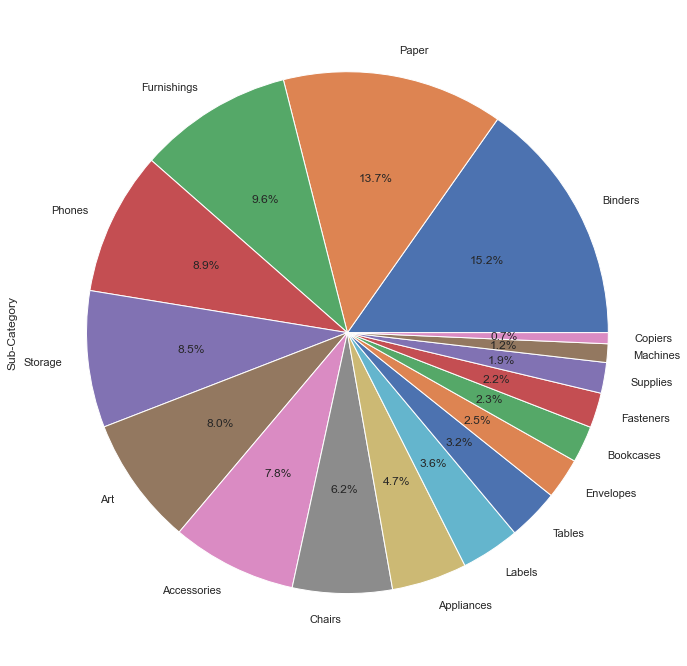

In [87]:
plt.figure(figsize=(12,12))
dataset['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

array([[<AxesSubplot:title={'center':'Discount'}>]], dtype=object)

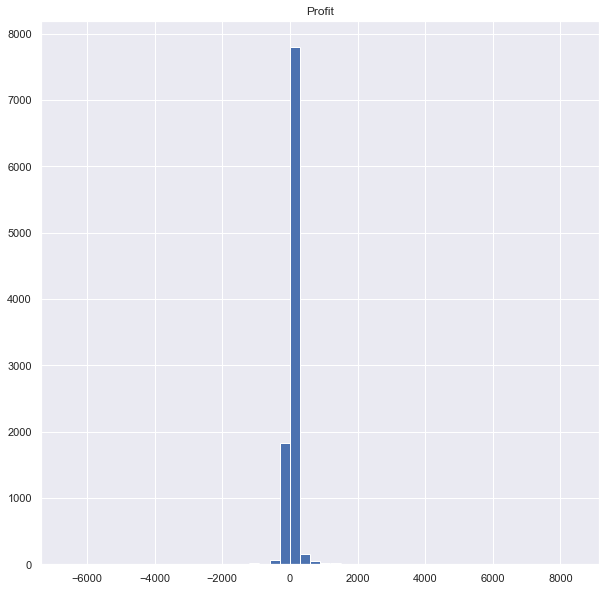

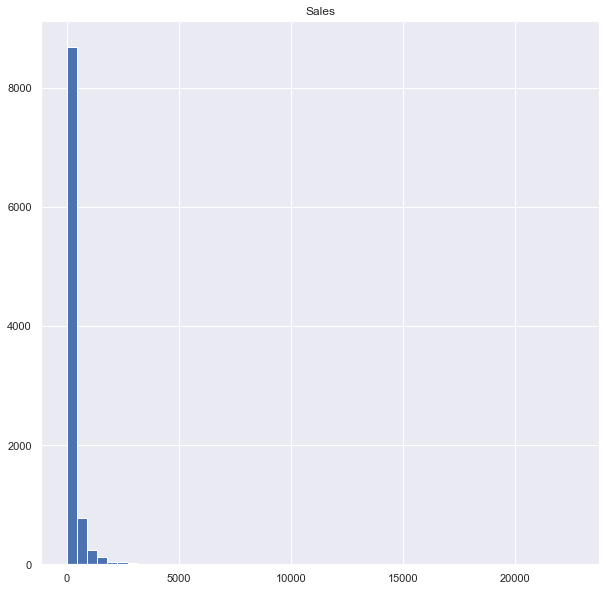

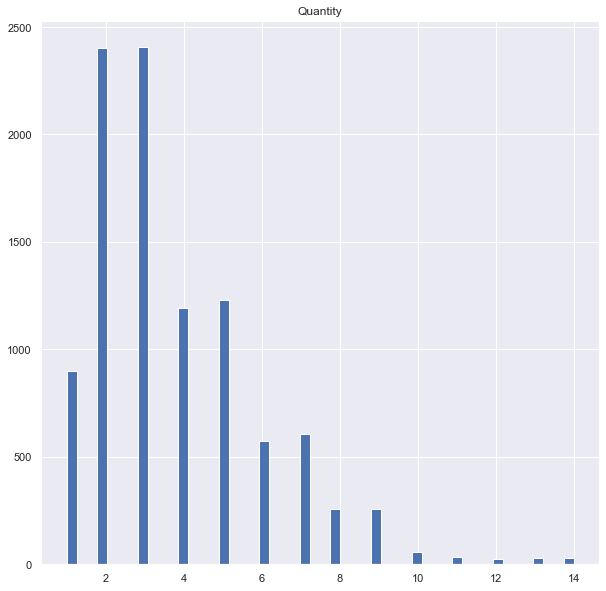

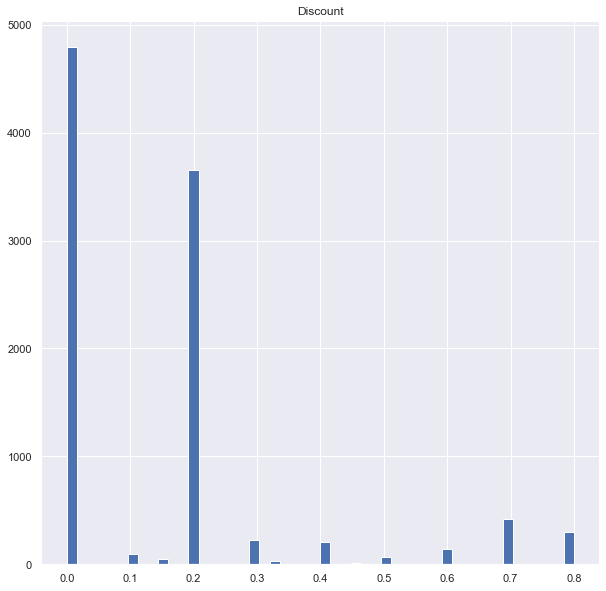

In [84]:
dataset.hist(['Profit'],bins=50,figsize=(10,10))
dataset.hist(['Sales'],bins=50,figsize=(10,10))
dataset.hist(['Quantity'],bins=50,figsize=(10,10))
dataset.hist(['Discount'],bins=50,figsize=(10,10))

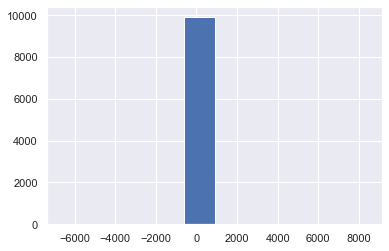

In [54]:
dataset['Profit'] .hist()
plt.show()

In [15]:
dataset['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

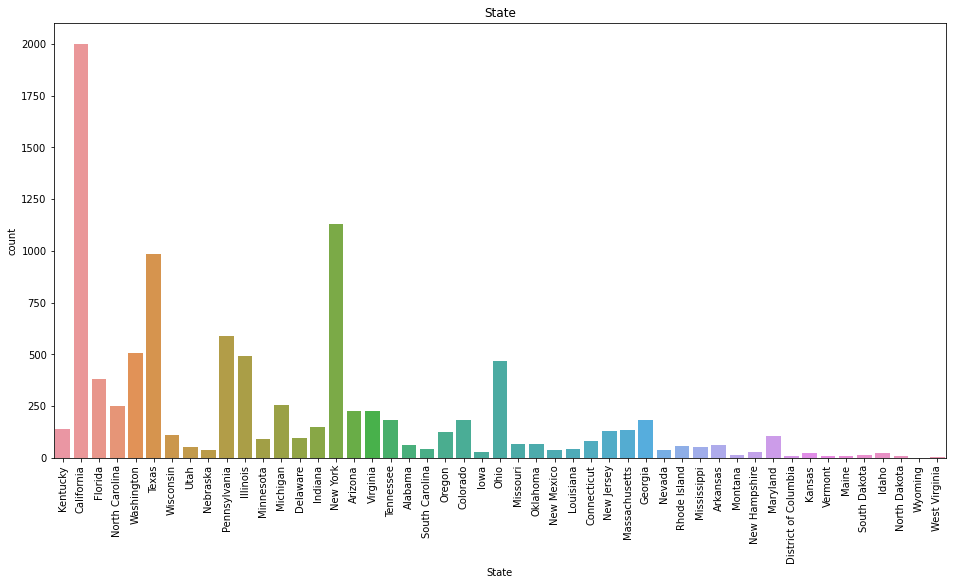

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(x=dataset['State'])
plt.xticks(rotation=90)
plt.title('State')
plt.show()


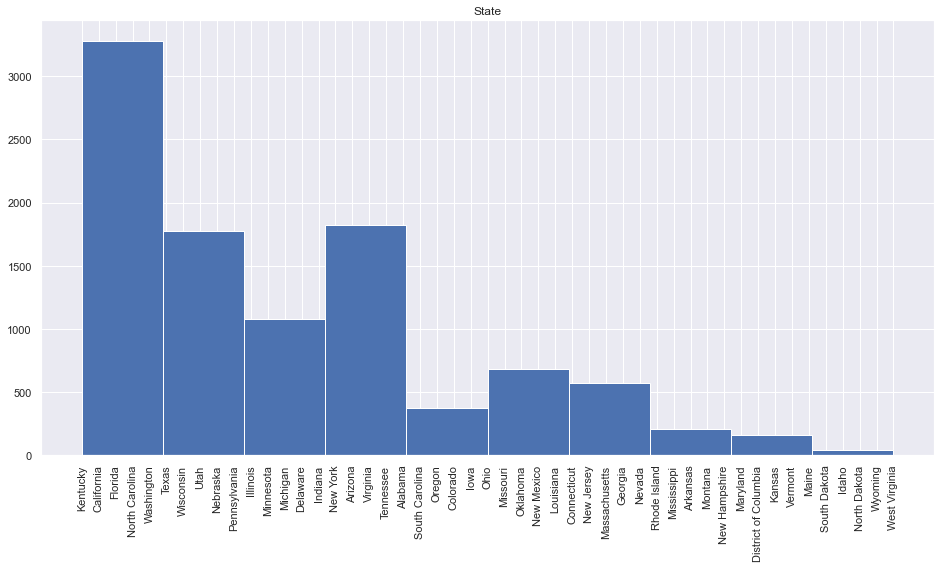

In [79]:
plt.figure(figsize=(16,8))
dataset['State'] .hist()
plt.xticks(rotation=90)
plt.title('State')
plt.show()

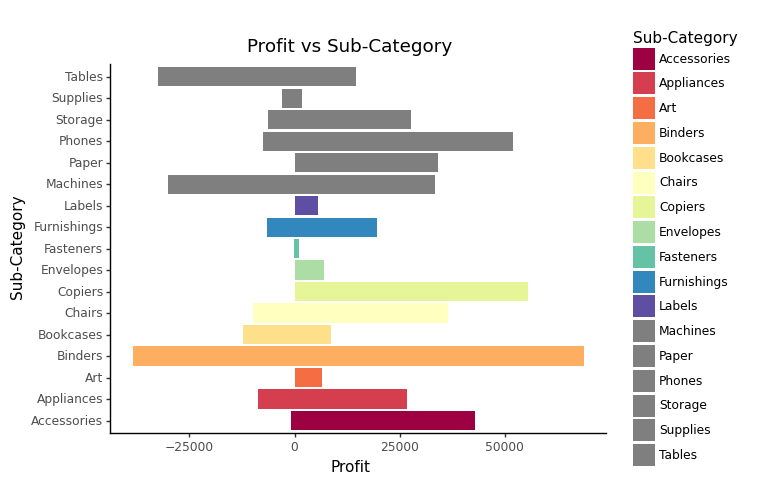

<ggplot: (133990195188)>

In [17]:
profit_plot = (ggplot(dataset,aes(x='Sub-Category',y='Profit',fill='Sub-Category'))+geom_col()+coord_flip()+scale_fill_brewer(type='div',palette='Spectral')+theme_classic()+ggtitle('Profit vs Sub-Category'))
display(profit_plot)

               

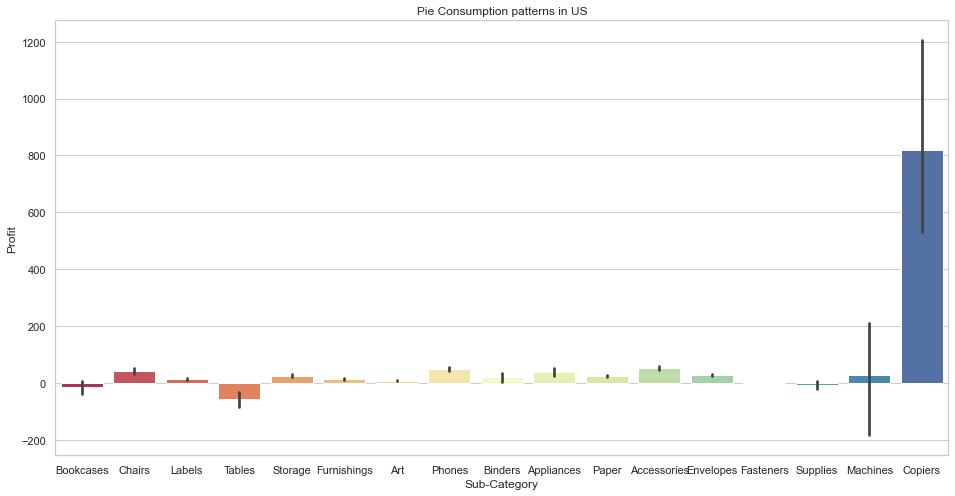

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
sns.barplot(x='Sub-Category',y='Profit',data=dataset,palette='Spectral')
plt.title('Pie Consumption patterns in US')
plt.show()

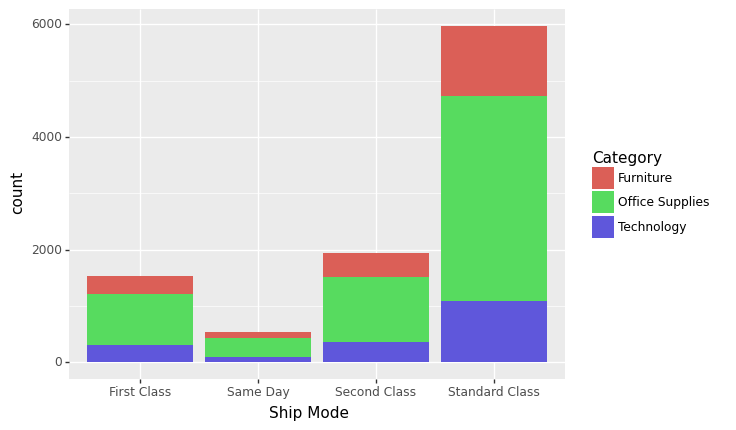

<ggplot: (133990654148)>

In [19]:
ggplot(dataset,aes(x='Ship Mode',fill = 'Category')) + geom_bar(stat='count')

<Figure size 1080x720 with 0 Axes>

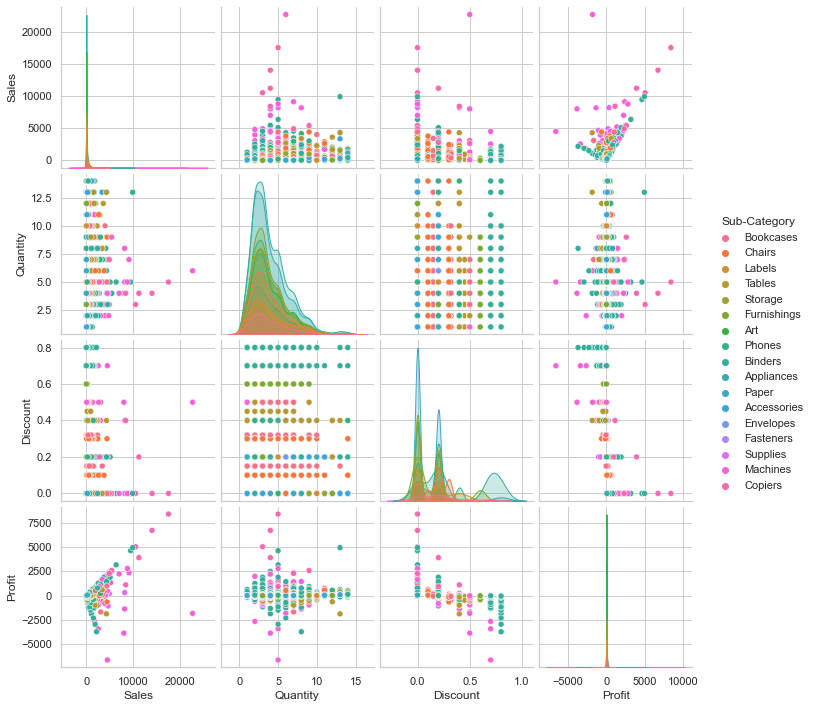

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(dataset,hue='Sub-Category')
plt.show()

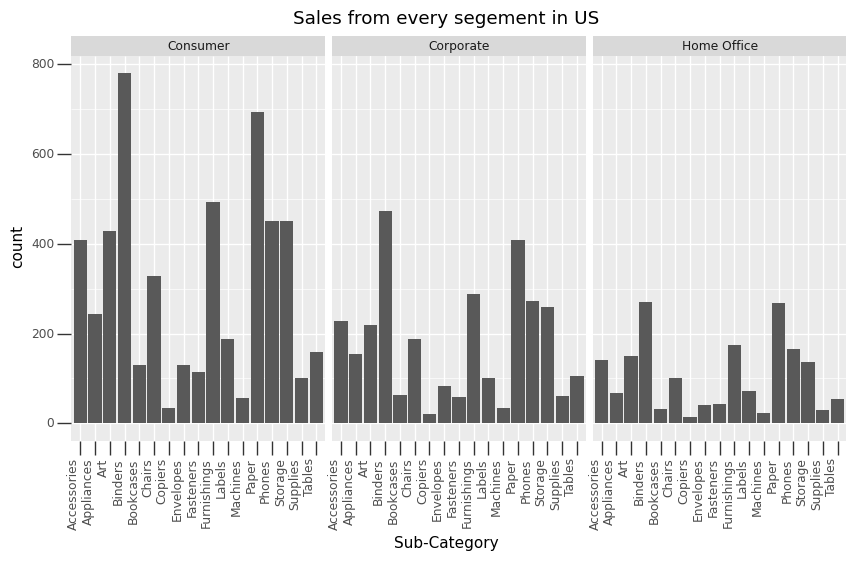

<ggplot: (133982316505)>

In [21]:
flip_xlabels = theme(axis_text_x = element_text(angle=90,hjust=1),figure_size=(10,5),axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(dataset,aes(x='Sub-Category',fill='Sales'))+geom_bar()+facet_wrap(['Segment'])+flip_xlabels+ggtitle('Sales from every segement in US'))



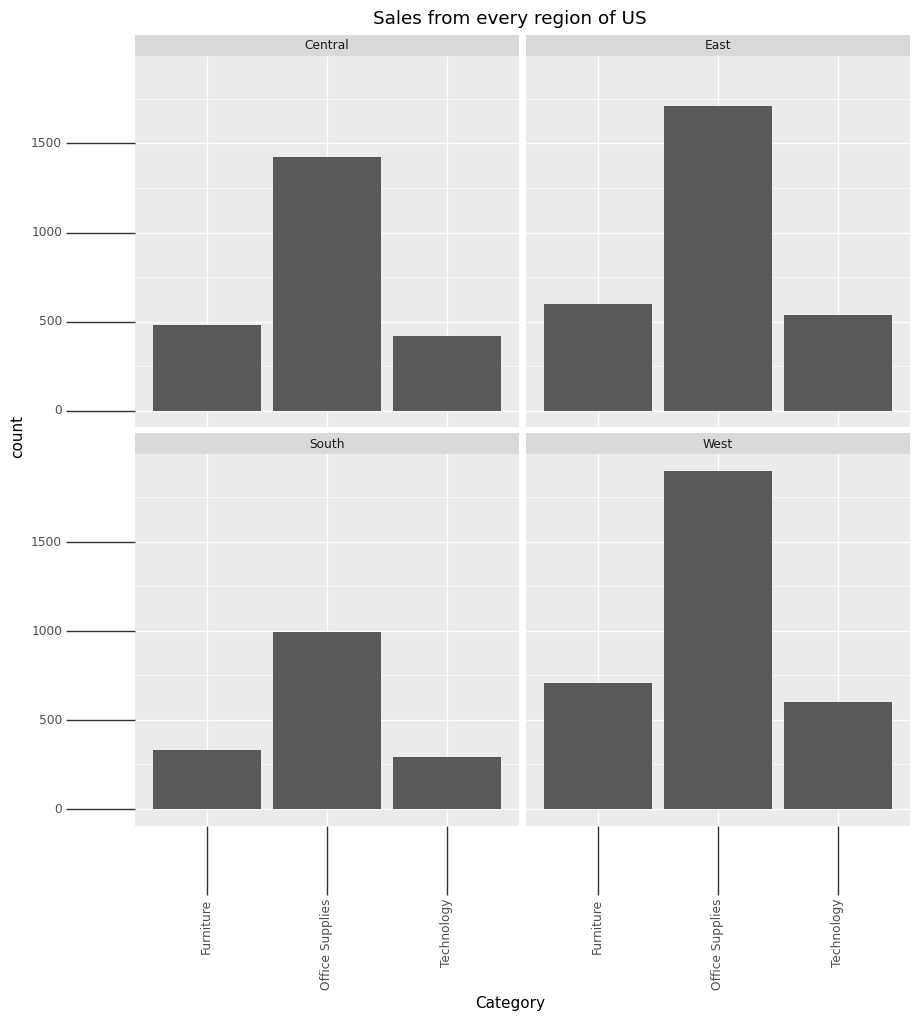

<ggplot: (133990558090)>

In [22]:
flip_xlabels  = theme(axis_text_x=element_text(angle=90,hjust=10),figure_size=(10,10),axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(dataset,aes(x='Category',fill='Sales'))+geom_bar()+facet_wrap(['Region'])+flip_xlabels+ggtitle('Sales from every region of US'))

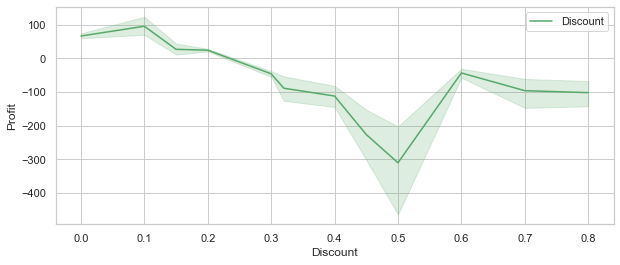

In [23]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit',data=dataset,color='g',label='Discount')
plt.show()

In [24]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
dataset['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [26]:
state_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
dataset['state_code'] = dataset.State.apply(lambda x:state_code[x])

In [27]:
state_data = dataset[['Sales','Profit','state_code']].groupby(['state_code']).sum()
fig = go.Figure(data=go.Choropleth(locations=state_data.index,z=state_data.Sales,locationmode='USA-states',colorscale='Reds',
                                  colorbar_title = 'Sales in USD'))
fig.update_layout(title_text='Total State-Wise Sales',geo_scope='usa',height=800)
fig.show()

In [28]:
def state_data_viewer(states):
    product_data = dataset.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax = plt.subplots(1,3,figsize=(28,5))
        fig.suptitle(state,fontsize=14)
        ax_index = 0
        for cat in ['Furniture','Office Supplies','Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit,y=cat_data.index,ax=ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1 
        fig.show()    

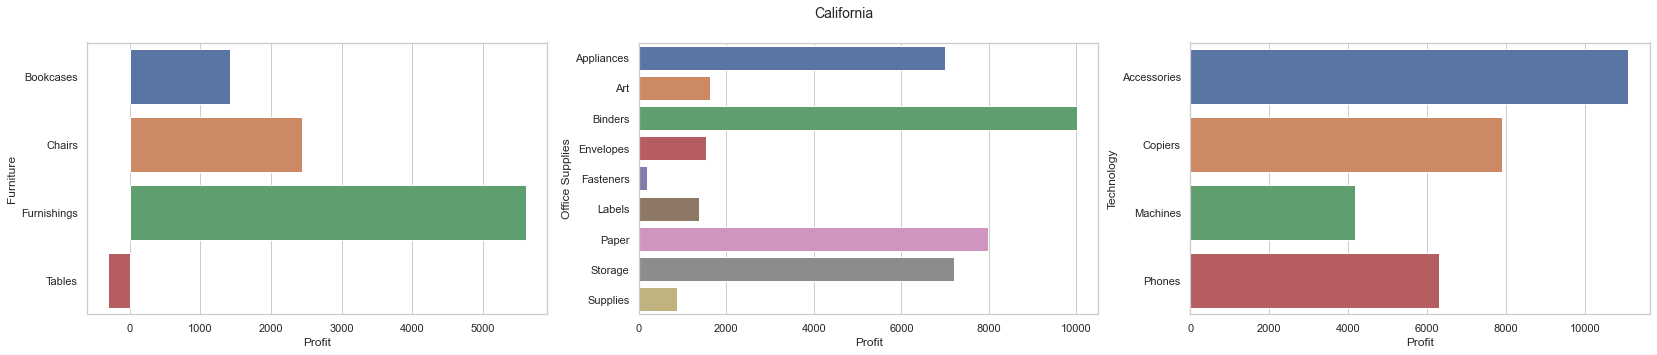

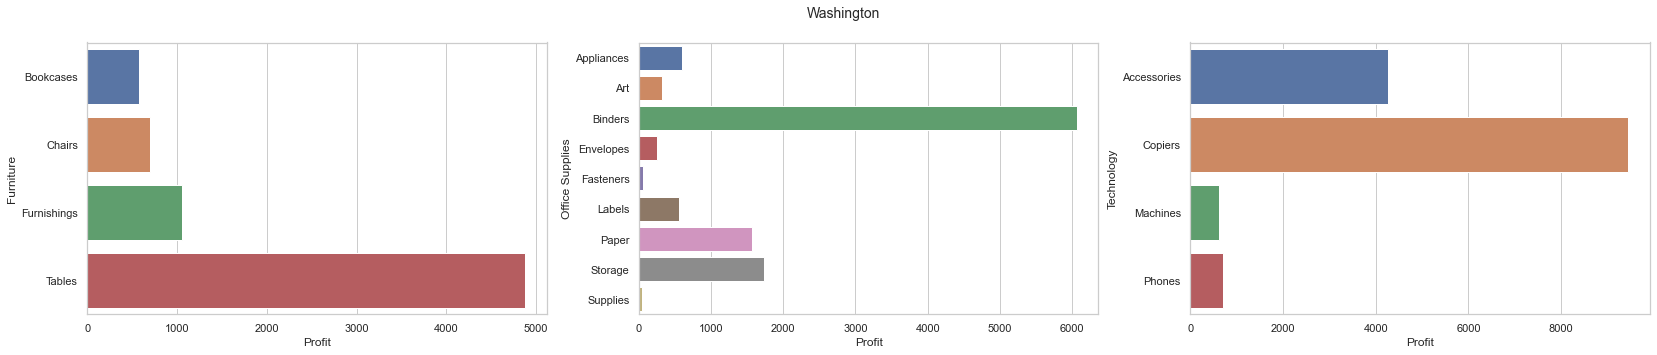

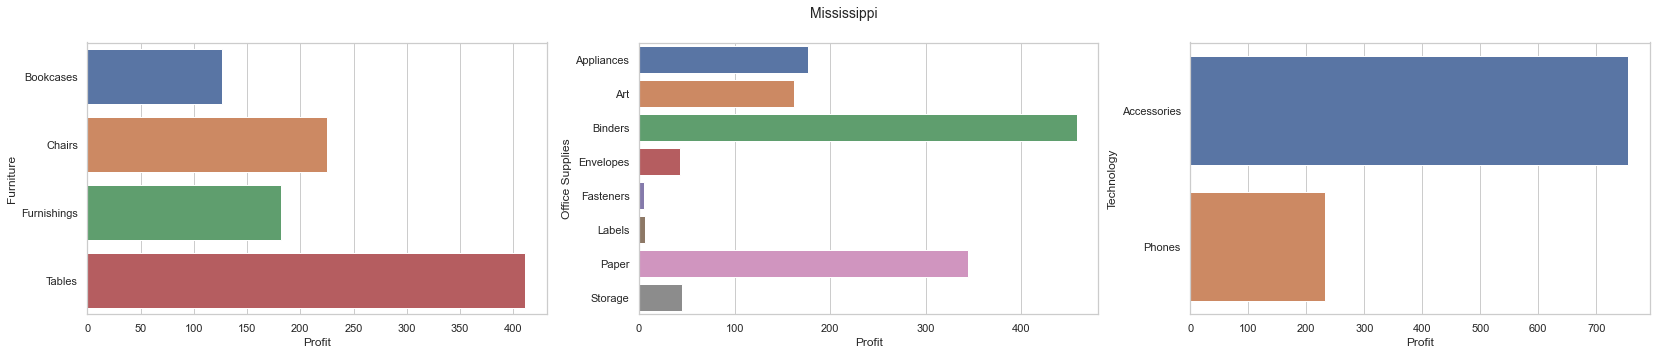

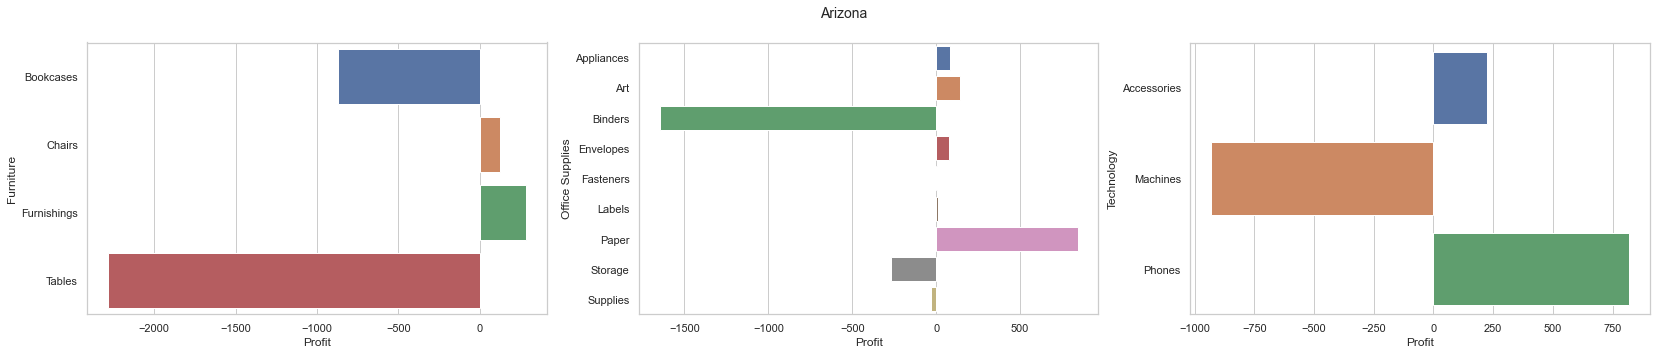

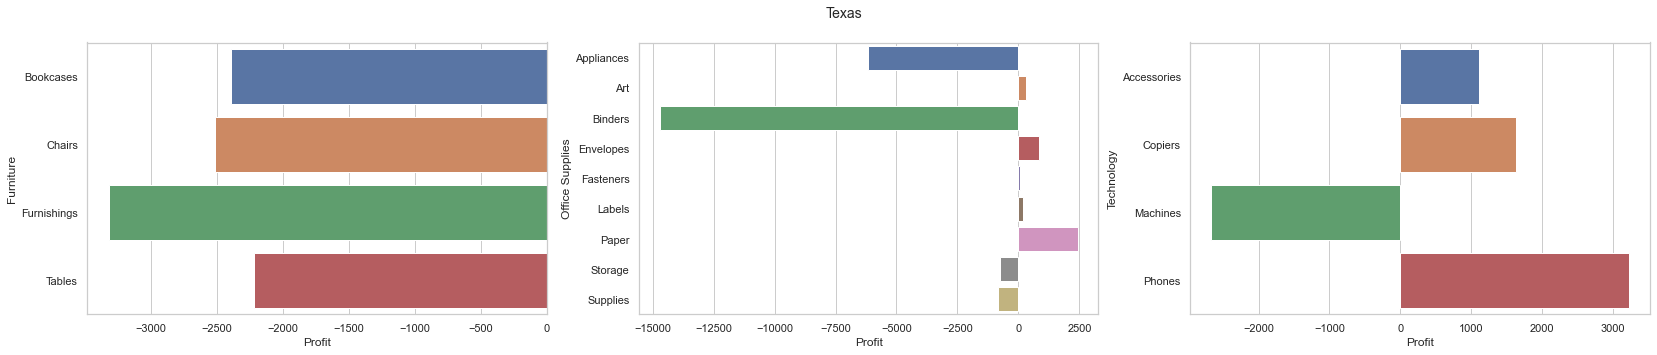

In [29]:
states = ['California','Washington','Mississippi','Arizona','Texas']
state_data_viewer(states)

From the above Visualisation,We can observe states and category and their profits and lossses.We can improve in those states by providing discounts and schemes.